In [13]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

## Dataframe vs Series vs List vs Array

In [48]:
my_list = [1,2]

In [49]:
my_dict={}
my_dict["andy"]=my_list
my_dict["camille"]=["andy","abc"]
my_dict

{'andy': [1, 2], 'camille': ['andy', 'abc']}

In [17]:
my_dataframe = pd.DataFrame(my_dict)
my_dataframe

,andy,camille
0,1,andy
1,2,abc


In [50]:
my_array = numpy.array(my_list)
my_array

array([1, 2])

In [52]:
print("-")
print(my_list[0])
print("-")
print(my_array[0])
print("-")
print(my_dataframe.loc[:,"andy"])
print("-")
print(my_dataframe.loc[:,"andy"][0])

-
1
-
1
-
0    1
1    2
Name: andy, dtype: int64
-
1


## contruction d'un échantillon

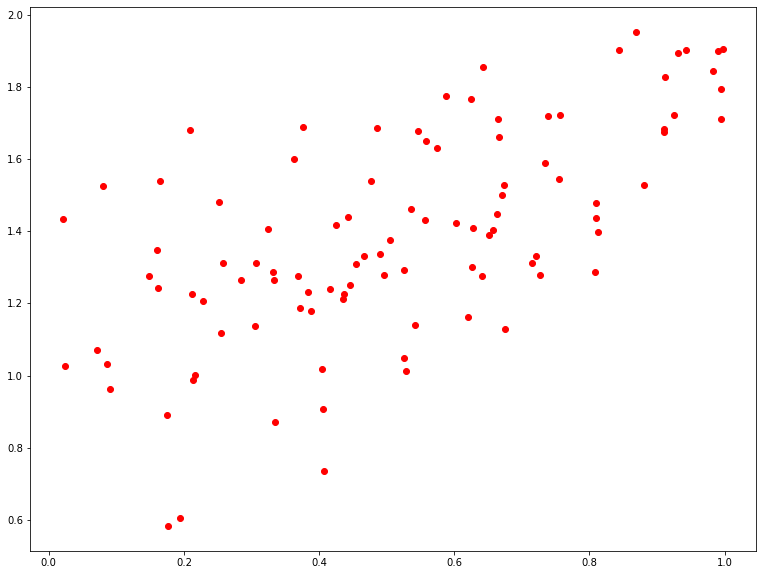

In [151]:
def linear(n,d):
    epsilon = np.random.normal(0, 0.2, (n,1)) #array
    X = np.append(np.random.rand(n,d), np.ones((n,1)),axis=1) #array / easy concat
    beta = np.random.rand(d+1,1) #array 
    Y = X.dot(beta) + epsilon #array  
    return Y, X, beta
  
Y, X, beta = linear (100,1)

plot(X[:,0],Y, 'ro')




show()

In [153]:
array_1 = np.append(np.zeros((10,1)),np.ones((10,1)),axis=1)
print(array_1)
array_2 = np.array([[0,1]]*10)
print(array_2)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [59]:
print(array_1[0][0])
print(array_2[0][0])
print(type(array_1[0][0]))
print(type(array_2[0][0]))

0.0
0
<class 'numpy.float64'>
<class 'numpy.int32'>


## Simple Regression : linregress et OLS et brut

In [60]:
from scipy.stats import linregress
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression

In [154]:
Y1 = Y.reshape((-1,)) # to get shape (n,) shape (n,1) don't work
regression1 = linregress(X[:,0],Y1) # use .reshape((-1,1)) to reverse to (n,1)
regression1

LinregressResult(slope=0.739005283279538, intercept=1.0078359659150056, rvalue=0.6486255810901362, pvalue=2.9454443702238146e-13, stderr=0.08759645282770726)

In [155]:
import statsmodels.api as sm

#sans cte
ols_model = sm.OLS(Y, X[:,0]) #Ordinary Least Square
results = ols_model.fit()
results.summary()

#avec cte
ols_model = sm.OLS(Y, X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     71.17
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.95e-13
Time:                        19:51:27   Log-Likelihood:                 7.6812
No. Observations:                 100   AIC:                            -11.36
Df Residuals:                      98   BIC:                            -6.152
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7390      0.088      8.436      0.000       0.565       0.913
const          1.0078      0.051     19.903      0.000       0.907       1.108
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.510
Skew:                          -0.175   Prob(JB):                        0.775
Kurtosis:                       2.984   Cond. No.                         4.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

#clf = KernelRidge(alpha=1e-10) #noyau linéaire
clf = LinearRegression()

clf.fit(X, Y)
Yhat = clf.predict(X)

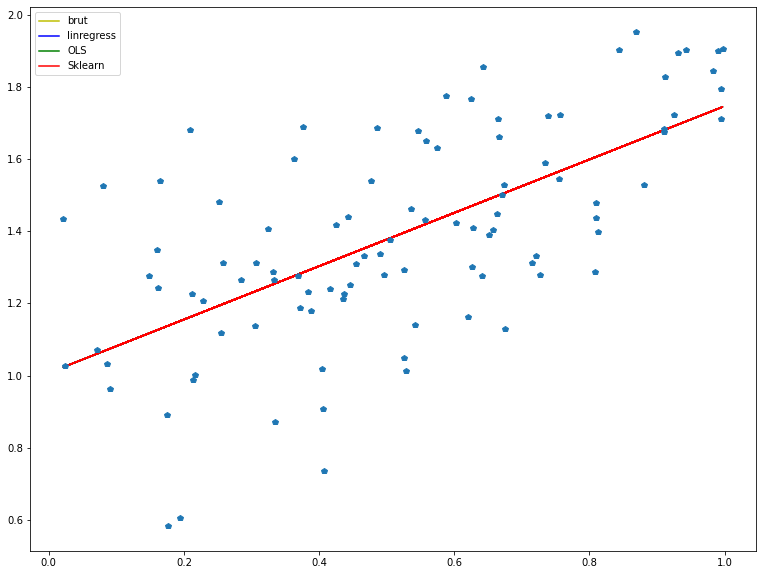

In [159]:
C = (X.T).dot(X)
Cinv = np.linalg.pinv(C)
betahat = Cinv.dot(X.T)
betahat = betahat.dot(Y)

plot(X[:,0], X.dot(betahat), 'y', label='brut')
plot(X[:,0], regression1.intercept + regression1.slope*X[:,0], 'b', label='linregress')
plot(X[:,0], results.params[1] + results.params[0]*X[:,0], 'g', label='OLS')
plot(X[:,0], Yhat, 'r', label='Sklearn')
plot(X[:,0],Y, 'p')

legend()
show()

# Regression Poly : OLS(non), brut(non), Sklearn

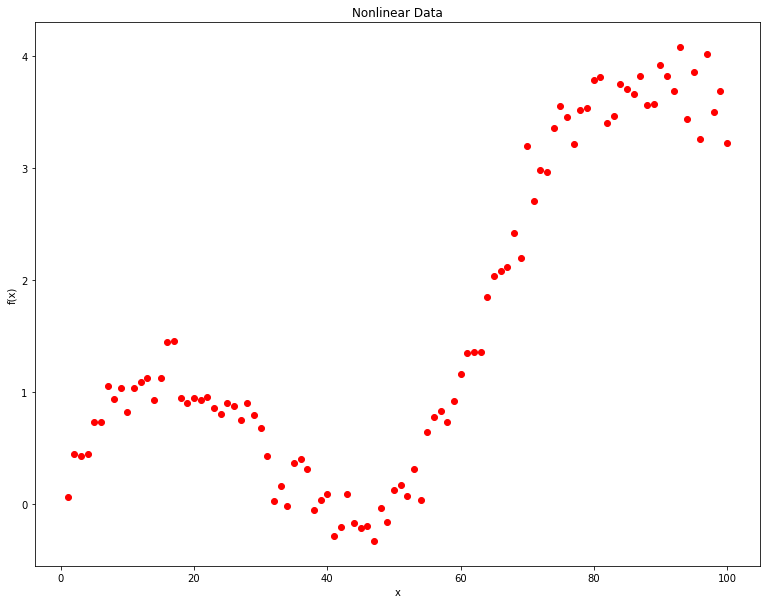

In [172]:
Xtemp = range(1,101)


def nonlinear(x):
    epsilon = np.random.normal(0, 0.2, len(x)+1)
    ynonlinear = [np.sin(i/10) + (i/50)**2 + epsilon[i] for i in x]
    return ynonlinear

Ytemp = nonlinear(Xtemp)

# transform from list to array (n,)

Xp = np.zeros((100,1))
Xp[:,0] = np.array(Xtemp)
Yp = np.zeros((100,1))
Yp[:,0] = np.array(Ytemp)

fig_size = [13,10]
rcParams["figure.figsize"] = fig_size


plot(Xp,Yp, 'ro')
xlabel("x")
ylabel("f(x)")
title("Nonlinear Data")
show()

#OLS trop compliqué car il faut écrire toutes les combinaisons polynomiales
#utile pour variable et formule connu
df = pd.DataFrame({'act_hours':np.random.uniform(1,4,100),'h_hours':np.random.uniform(1,4,100),
                  'month':np.random.randint(0,3,100),'trend':np.random.uniform(0,2,100)})

model = 'act_hours ~ h_hours + I(h_hours**2)'
hours_model = sm.ols(formula = model, data = df)

hours_model.exog[:5,] #5 premiers

clf = KernelRidge(kernel='rbf',gamma=0.01,alpha=1e-1)

clf.fit(X, Y)
Yhat = clf.predict(X)

In [1]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
param_grid

{'dual': [True, False], 'max_iter': [100, 110, 120, 130, 140]}